In [0]:
### IMPORTAÇÃO DAS BIBLIOTECAS ###

import matplotlib.pyplot as plt # importação da biblioteca matplotlib
import numpy as np # importação da biblioteca numpy 
import seaborn as sns # importação da biblioteca seaborn
import pandas as pd # importação da biblioteca pandas

In [0]:
#READ FILE WITH DATASET
df = pd.read_csv("amazon_main.csv", encoding ='latin1')
# df.head()


#EXECUTIONS

#3.1 - Query example state equals to Acre
#df.loc[df['state'] == 'Acre'].count()

#3.2 - Query example  Year bigger or equals to 2099 
#df.loc[df['year'] >= 2099].count()

#3.3 - Query example number bigger then 0 
#df.loc[df['number'] > 15].count()

#Practice

df.loc[df["number"] != 0]
# df.head()
df["month"].describe()

#sns.pairplot(data=df, x_vars=df["state"], y_vars=df["year"])



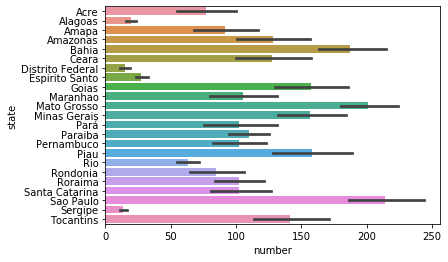

In [37]:
g = sns.barplot(data=df, x="number", y="state")#.fig.set_size_inches(15,15)
# g.fig.set_size_inches(15,15)

# New Section

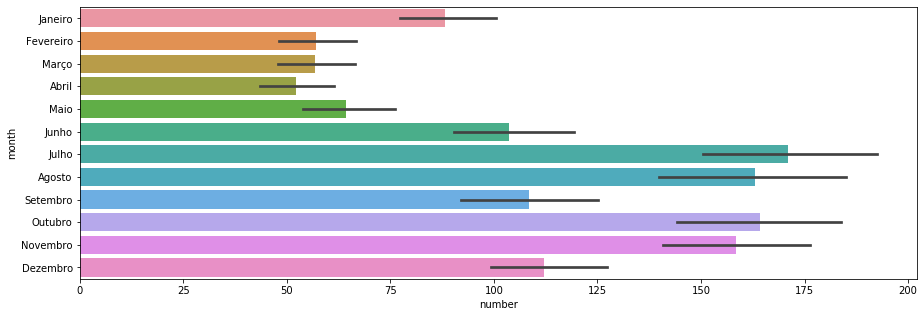

In [43]:
plt.figure(figsize=(15, 5))
g = sns.barplot(data=df, x="number", y="month")

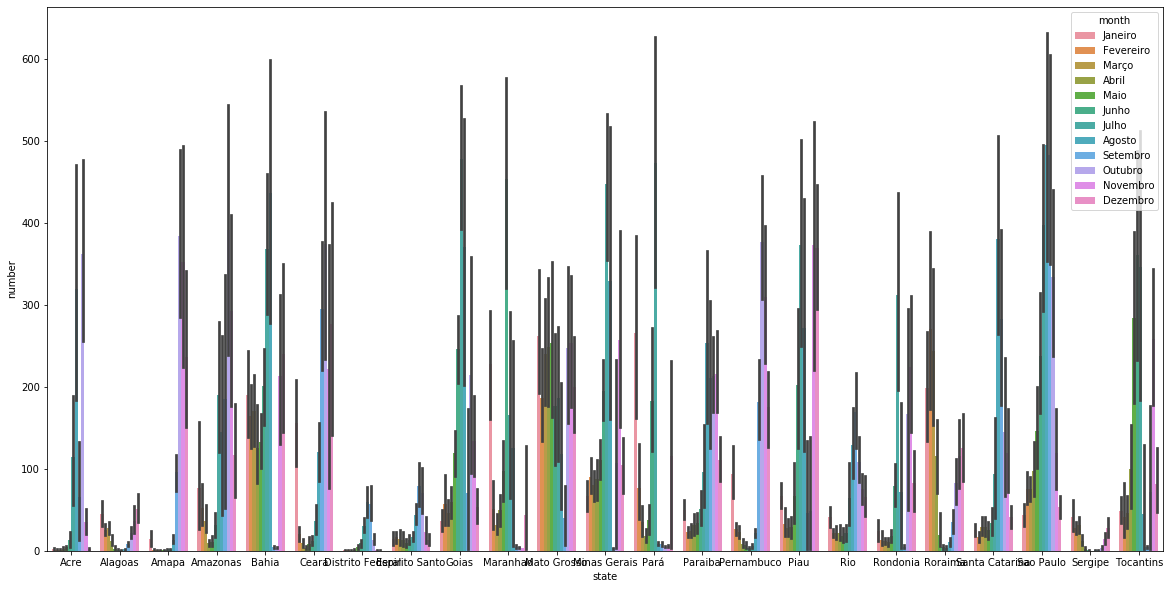

In [57]:
plt.figure(figsize=(20, 10))
g = sns.barplot(data=df, x="state", y="number", hue="month")


In [74]:

#df.DataFrame({'A': [1, 2, 3, 4]}, index=i)
#df["month"][0:3]


#df = pd.DataFrame({'month':['Janeiro','Fevereiro','Dezembro']})
#df.head()

#something.isin(somewhere)
#df.month.isin(['Janeiro','Fevereiro','Dezembro'])


#df.loc[df['month']['Janeiro','Fevereiro','Dezembro']]

df.loc[df['month'].isin('Janeiro','Fevereiro','Dezembro')

SyntaxError: ignored